In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

In [53]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本，2个样本特征
x1, y1 = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本，2个样本特征均值都为3
x2, y2 = make_gaussian_quantiles(mean=(3, 3), n_samples=500, n_features=2, n_classes=2)
# 将两组数据合成一组数就据
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, - y2 + 1))

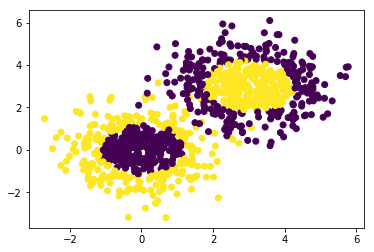

In [54]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

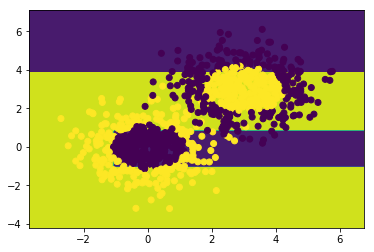

In [55]:
# 决策树模型
model = tree.DecisionTreeClassifier(max_depth=3)

# 输入数据建立模型
model.fit(x_data, y_data)

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [56]:
# 模型准确率
model.score(x_data, y_data)

0.78

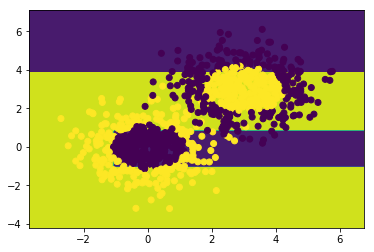

In [57]:
# AdaBoost模型
mpdel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
# 训练模型

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [58]:
# 模型准确率
model.score(x_data, y_data)

0.78